In [158]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [159]:
df = pd.read_csv("updated.csv")
df['remaining_quantity'] = df['demand'] - df['available']

In [163]:
def scale(x):
    if "kg" in x:
        return float(x[:-2])*1000
    elif "g" in x:
        return float(x[:-1])
    elif "ml" in x:
        return float(x[:-2])
    elif "l" in x or "L" in x:
        return float(x[:-1])*1000
    else:
        return float(x)

In [164]:
df['weight'] = df['weight'].apply(scale)
chosen_features = ["expire_in", "remaining_quantity", "price", "weight"]

In [169]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    scaler = StandardScaler()
    model = scaler.fit(df[chosen_features])
    scaled_data = model.transform(df[chosen_features])
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data)
 
    distortions.append(sum(np.min(cdist(df[chosen_features], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df[chosen_features].shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df[chosen_features], kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df[chosen_features].shape[0]
    mapping2[k] = kmeanModel.inertia_

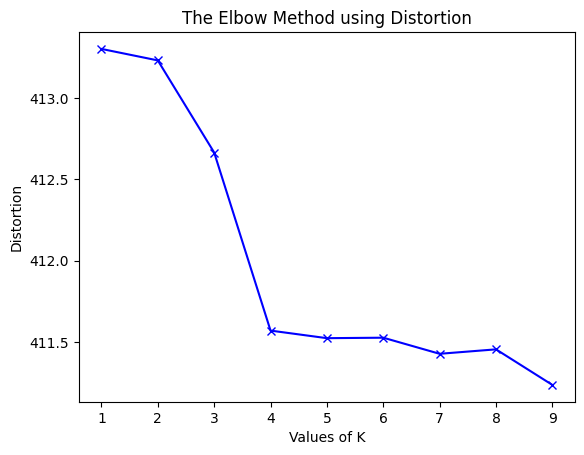

In [170]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [171]:
df_km = df[chosen_features]

In [172]:
scaler = StandardScaler()
model = scaler.fit(df[chosen_features])
scaled_data = model.transform(df[chosen_features])
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(scaled_data)

df_km["Y"]= kmeanModel.predict(scaled_data)




C:\Users\adhir\AppData\Local\Temp\ipykernel_48676\1065714241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_km["Y"]= kmeanModel.predict(scaled_data)


In [174]:

# 0 - recycle 0 1 
# 1 - distribute 3 2

In [175]:
df_km.loc[df_km["Y"]==2,'Y'] = 0
df_km.loc[df_km["Y"]==3,'Y'] = 1
df_km.loc[df_km["Y"]==1,'Y'] = 1

In [177]:
scaler = StandardScaler()
X_train = scaler.fit_transform(df_km[chosen_features])


In [179]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, df_km["Y"])

KNeighborsClassifier(n_neighbors=2)

In [180]:
knn.predict(X_train)

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)